In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_lib

import mnist_sbn_experiments_lib as sbn_lib

import torch.optim as optim

from copy import deepcopy

from torch.distributions import Categorical

import itertools

In [3]:
softmax = nn.Softmax(dim = 0)

sigmoid = nn.Sigmoid()

In [4]:
np.random.seed(4524)
_ = torch.manual_seed(4524)

# Load MNIST data

In [5]:
training_mnist_data = mnist_data_lib.load_mnist_data()
train_set, test_set = mnist_data_lib.get_mnist_dataset(propn_sample=0.001)

print('num_train: ', train_set.num_images)
print('num_test: ', test_set.num_images)


num_train:  60
num_test:  10


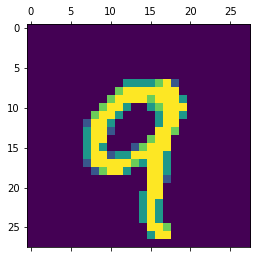

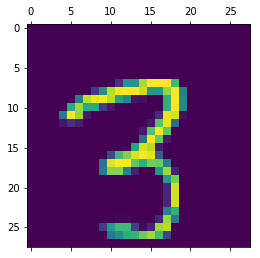

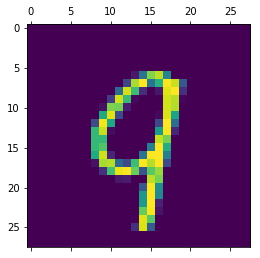

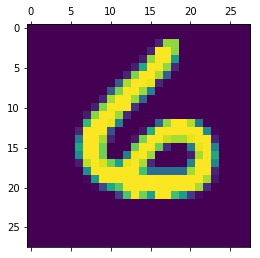

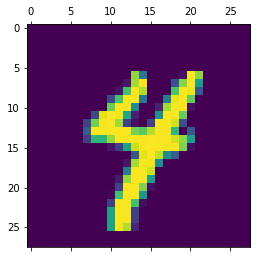

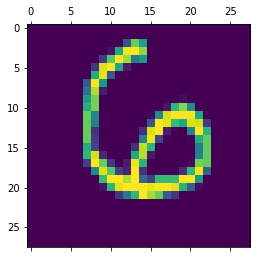

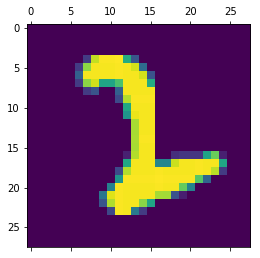

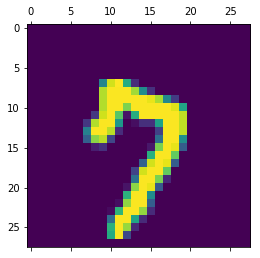

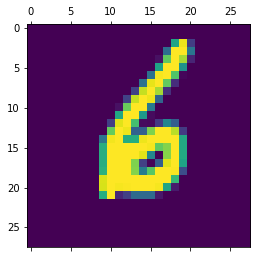

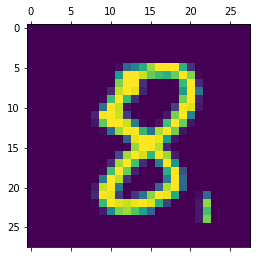

In [6]:
for i in range(10): 
    plt.matshow(train_set[i]['image'].squeeze())


### Data loaders

In [7]:
batchsize = 10

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [8]:
# for experimentation, get one batch
for batch_idx, d in enumerate(train_loader):
    data = d
    break


# Define VAE

In [9]:
latent_dim = 5
slen = data['image'].shape[1]

encoder = sbn_lib.NonLinearEncoder(slen=slen, latent_dim=latent_dim)
decoder = sbn_lib.NonLinearDecoder(slen=slen, latent_dim=latent_dim)

vae = sbn_lib.VAE(encoder, decoder)

In [10]:
latent_params = vae.encoder.forward(data['image'])

In [11]:
image_means = vae.decoder.forward(latent_params)

In [12]:
image_means.shape

torch.Size([10, 28, 28])

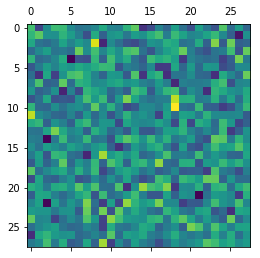

In [13]:
plt.matshow(image_means[0, :, :].detach())

In [14]:
vae.loss(data['image'])

tensor([ 549.5186,  547.9843,  549.2314,  548.9771,  549.5328,  548.5342,
         548.5187,  549.0516,  549.9212,  549.5912])